This project was completed by Andrew En-maari Yahaya

This project aims to study and observe student behavorial habits and how it affects their overall performance in school.

The project will also aim to develop several machine learning models to predict the exam score of the students based on the studied behaviors

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
df = pd.read_csv('student_habits_performance.csv')
df.shape

(1000, 16)

In [57]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [58]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [60]:
df['parental_education_level'].head()

0         Master
1    High School
2    High School
3         Master
4         Master
Name: parental_education_level, dtype: object

In [61]:
df.dtypes

student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

In [62]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [63]:
columns=['age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score']

for col in columns:
    if df[col].dtype == "object":
        print(f"Unique {col} contents: {df[col].unique()}")

Unique gender contents: ['Female' 'Male' 'Other']
Unique part_time_job contents: ['No' 'Yes']
Unique diet_quality contents: ['Fair' 'Good' 'Poor']
Unique parental_education_level contents: ['Master' 'High School' 'Bachelor' nan]
Unique internet_quality contents: ['Average' 'Poor' 'Good']
Unique extracurricular_participation contents: ['Yes' 'No']


In [64]:
df['parental_education_level'].mode()
df['parental_education_level'].fillna(df['parental_education_level'].mode()[0],inplace=True)

/tmp/ipykernel_742217/2424464917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna(df['parental_education_level'].mode()[0],inplace=True)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

MODELS

In [66]:
# Function to evaluate model performance

def evaluate(model,y_test,y_pred):
    print(f'Evaluation of {model}')
    print(f'R2Score: ',r2_score(y_test,y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# le=LabelEncoder()

In [68]:
# Select your features
features = df[['age', 'gender', 'study_hours_per_day',
               'social_media_hours', 'netflix_hours', 'part_time_job',
               'attendance_percentage', 'sleep_hours', 'diet_quality',
               'exercise_frequency', 'parental_education_level', 'internet_quality',
               'mental_health_rating', 'extracurricular_participation', 'exam_score']]

target = df['exam_score']


cat_cols = []
num_cols = []

for col in features.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    elif df[col].dtype in ['int64', 'float64']:
        num_cols.append(col)
        print(f'{col} is Numerical')

print("\nCategorical columns:", cat_cols)


age is Numerical
study_hours_per_day is Numerical
social_media_hours is Numerical
netflix_hours is Numerical
attendance_percentage is Numerical
sleep_hours is Numerical
exercise_frequency is Numerical
mental_health_rating is Numerical
exam_score is Numerical

Categorical columns: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


In [69]:
print("\nCategorical columns:", cat_cols)
print("\nNumerical columns:", num_cols)


Categorical columns: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

Numerical columns: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


In [70]:
one_hot=OneHotEncoder(sparse_output=False,handle_unknown='ignore')


In [71]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)



In [72]:
preprocessor=ColumnTransformer(transformers=[
    ('Numerical Columns', StandardScaler(), num_cols),
    ('CAtegorical Cols',one_hot, cat_cols)
])
preprocessor

ColumnTransformer(transformers=[('Numerical Columns', StandardScaler(),
                                 ['age', 'study_hours_per_day',
                                  'social_media_hours', 'netflix_hours',
                                  'attendance_percentage', 'sleep_hours',
                                  'exercise_frequency', 'mental_health_rating',
                                  'exam_score']),
                                ('CAtegorical Cols',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['gender', 'part_time_job', 'diet_quality',
                                  'parental_education_level',
                                  'internet_quality',
                                  'extracurricular_participation'])])

In [73]:
rf_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('Model', RandomForestRegressor())
])
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('Model', RandomForestRegressor())])

In [74]:
rf_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('Model', RandomForestRegressor())])

In [75]:
rf_ypred = rf_pipeline.predict(x_test)

evaluate('Random Forest', y_test,rf_ypred)

Evaluation of Random Forest
R2Score:  0.9986883893072496
MAE: 0.11937666666666237


In [76]:
# XGBoost

xgb_pipeline=Pipeline(steps=[
    ('Preprocessor', preprocessor),
    ('Model', XGBRegressor())
])
xgb_pipeline

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [77]:
xgb_pipeline.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [78]:
xgb_ypred = xgb_pipeline.predict(x_test)

evaluate('XGBoost',y_test,xgb_ypred)

Evaluation of XGBoost
R2Score:  0.9984883628337156
MAE: 0.24649444707234675


In [79]:
# Linear model

In [80]:
linear_pipeline=Pipeline(steps=[
    ('Preprocessor', preprocessor),
    ('Model', LinearRegression())
])
linear_pipeline

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('Model', LinearRegression())])

In [81]:
linear_pipeline.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('Model', LinearRegression())])

In [82]:
linear_ypred = linear_pipeline.predict(x_test)

evaluate('Linear Model',y_test,linear_ypred)

Evaluation of Linear Model
R2Score:  1.0
MAE: 1.635432530141164e-14


In [83]:
ridge_pipeline=Pipeline(steps=(
    ('Preprocessor',preprocessor),
    ('Model', Ridge())
))
ridge_pipeline

Pipeline(steps=(('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('Model', Ridge())))

In [84]:
ridge_pipeline.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('Model', Ridge())])

In [85]:
ridge_ypred=ridge_pipeline.predict(x_test)

evaluate('Ridge', y_test, ridge_ypred)

Evaluation of Ridge
R2Score:  0.9999792792893103
MAE: 0.06043498808709616


In [86]:
lasso_pipeline=Pipeline(steps=(
    ('Preprocessor',preprocessor),
    ('Model', Lasso())
))
lasso_pipeline

Pipeline(steps=(('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('Model', Lasso())))

In [87]:
lasso_pipeline.fit(x_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical Columns',
                                                  StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'exam_score']),
                                                 ('CAtegorical Cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('Model', Lasso())])

In [88]:
lasso_ypred=lasso_pipeline.predict(x_test)
evaluate('Lasso Regression', y_test, lasso_ypred)

Evaluation of Lasso Regression
R2Score:  0.9965140898959688
MAE: 0.7699336199907791


In [89]:
df['exam_score'].unique()

array([ 56.2, 100. ,  34.3,  26.8,  66.4,  89.8,  72.6,  78.9,  63.3,
        74.4,  76.9,  75.8,  74. ,  55.2,  70.8,  43.9,  45.3,  58.5,
        82.5,  98.7,  43.7,  54.9,  69.9,  73.5,  71.1,  82.8,  75.7,
        70.6,  51.3,  52.1,  70.7,  51.2,  59.4,  58.1,  82.3,  69.7,
        66. ,  63.5,  65.7,  78.5,  75.1,  71. ,  59.7,  52.6,  96.5,
        62. ,  48.4,  68.1,  87.2,  66.7,  75.2,  46.4,  97.1,  61.2,
        75. ,  94.7,  77.6,  68.6,  69.6,  66.5,  62.2,  82.1,  55.1,
        77.1,  97.7,  66.9,  99.9,  57.2,  77.3,  91.6,  57.6,  60.2,
        50.5,  53.5,  79.2,  47.2,  73.4,  41.1,  77.8,  63.4,  70.2,
        81.3,  50.2,  87.9,  80.9,  63.9,  65.6,  93.2,  60.8,  50.4,
        74.3,  32.8,  60.4,  60. ,  77.5,  86.5,  83.3,  82.7,  94.8,
        80.8,  58.3,  66.3,  60.5,  84.8,  77. ,  61.7,  44. ,  42.4,
        88. ,  48.7,  81.6,  78.4,  67.6,  64.7,  64.1,  83.5,  96.2,
        65.4,  46.7,  75.5,  78.1,  85.2,  75.4,  64.2,  90.3,  81.4,
        65. ,  57.3,

COMPARING PREDICTED SCORES WITH ACTUAL SCORES

TO VISUALIZE THE ACCURACY OF THE PREDICTIONS FOR ALL FIVE MACHINE LEARNING MODELS, PLOT THE ACTUAL EXAM SCORE AGAINST THE PREDICTED EXAM SCORE FOR ALL MODELS AND OBSERVE HOW FAR THE POINTS STRAY FROM THE LINE Y=X. THE CLOSSER THE POINTS ARE TO THE LINE THE MORE ACCURATE THE PREDICTION IS.

In [90]:
def plots_pred(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
    plt.xlabel("Actual Exam Score")
    plt.ylabel("Predicted Exam Score")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Since there are five different models, i will apply a for loop for the visualization. i've already defined a function 'plots_pred' that takes some arguments (y_test, y_pred, title).

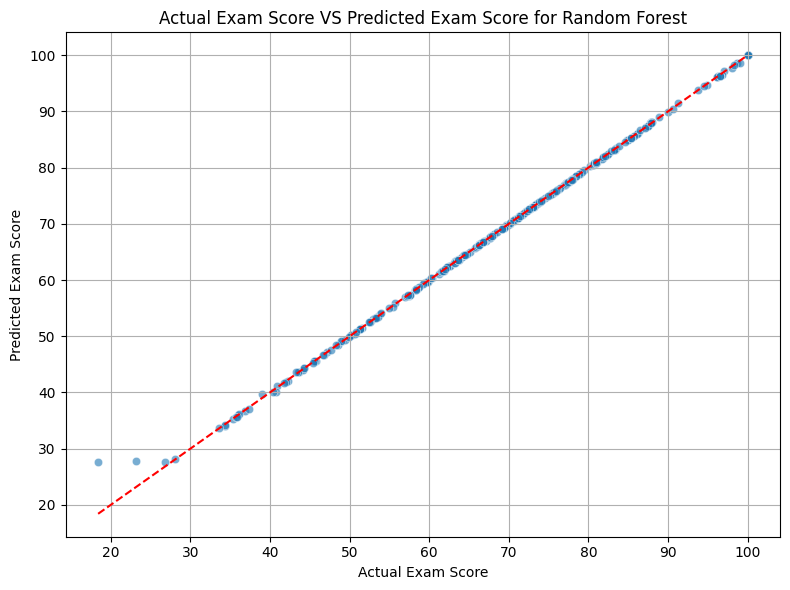

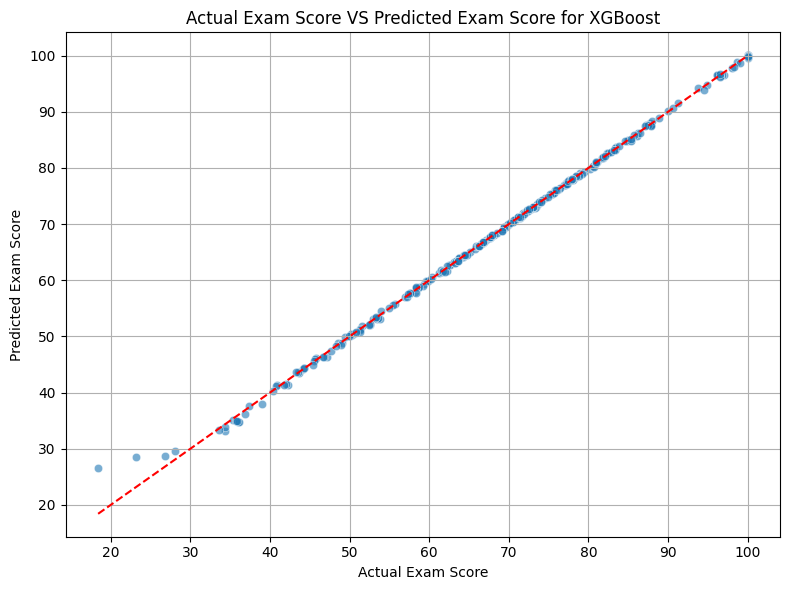

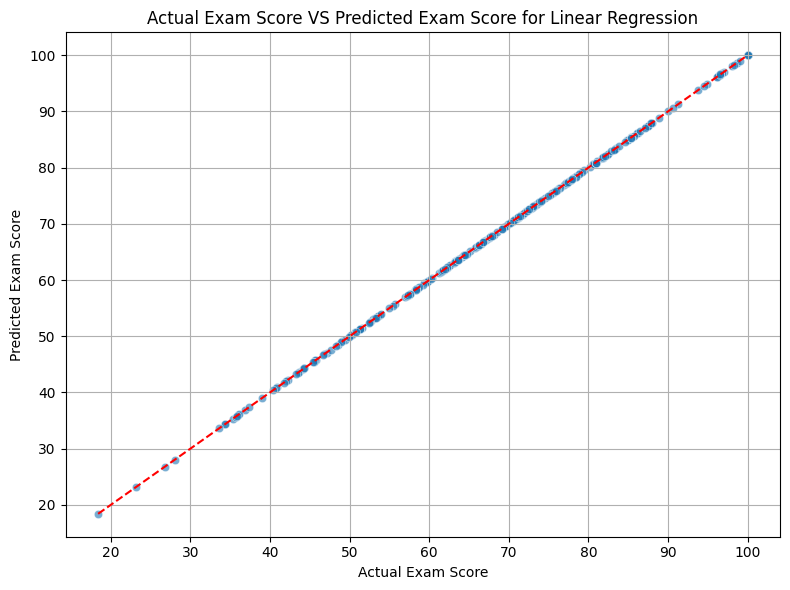

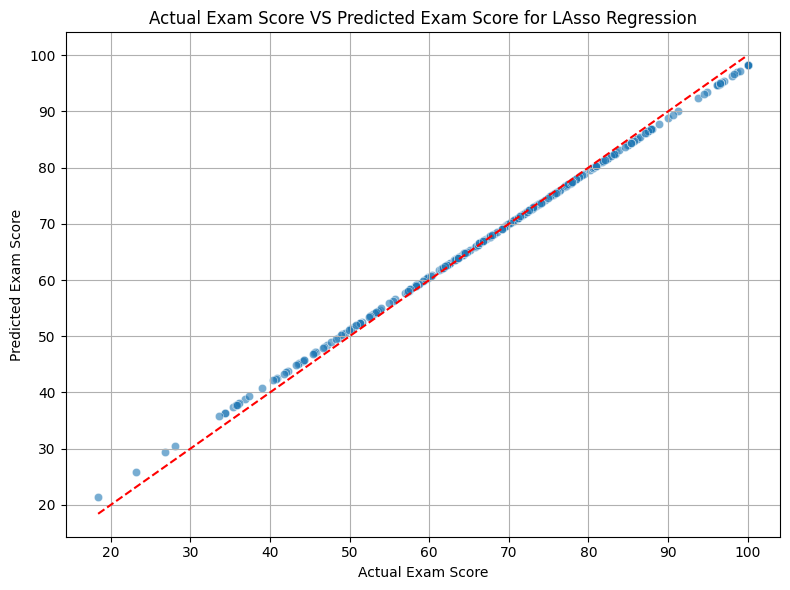

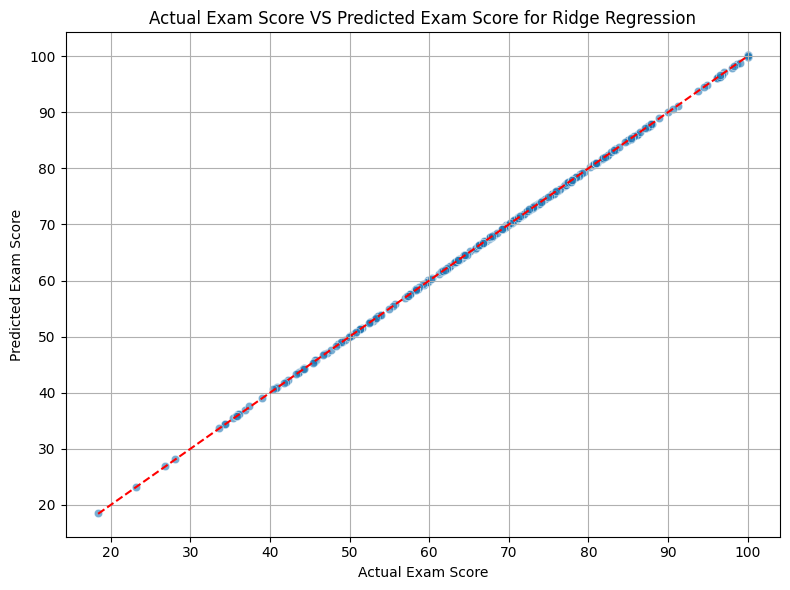

In [91]:
y_preds=[rf_ypred,xgb_ypred,linear_ypred,lasso_ypred,ridge_ypred]
models=['Random Forest', 'XGBoost', 'Linear Regression', 'LAsso Regression', 'Ridge Regression']
for model, pred in zip(models, y_preds):
    plots_pred(y_test, pred, title=f'Actual Exam Score VS Predicted Exam Score for {model}')



TO DO

Find Corelation between study hours and exam score                                
impact of social media usage on exam performance                                  
Effect of sleep hours on mental health and exam scores                          
Gender based perfomance difference                                                
Extra curricular participation and its effects                                    
Relationship between attendance and exam scores                                 

In [92]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

The columns of df contains both numerical and non-numerical entries. First separte the columns into numerical, find the correlation and visualize using a heatmat

In [93]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        print(f'{col} is numerical')

age is numerical
study_hours_per_day is numerical
social_media_hours is numerical
netflix_hours is numerical
attendance_percentage is numerical
sleep_hours is numerical
exercise_frequency is numerical
mental_health_rating is numerical
exam_score is numerical


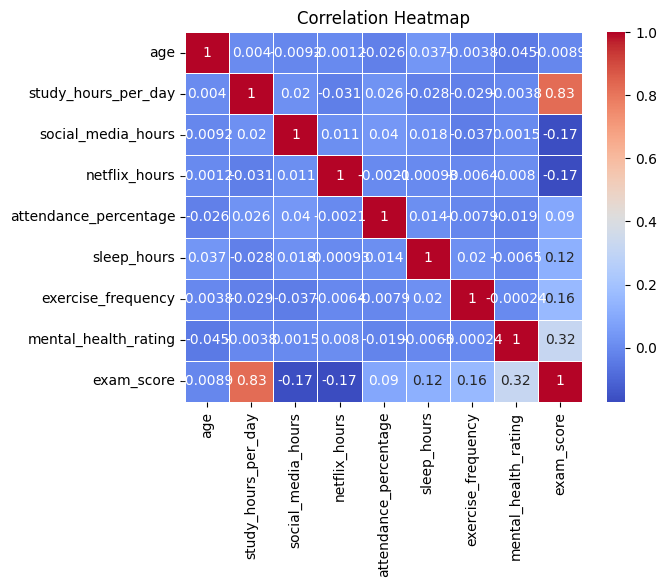

In [94]:
new_df=df[['age', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours',
       'exercise_frequency',
       'mental_health_rating', 'exam_score']]

corr=new_df.corr()

sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation between study hours and exam score as seen in the heatmap is 0.83 in the positive direction sugesting that for the most part, the longer one studies the higher marks the person makes in the exams

Social media usage hours on the other hand has a correlation of 0.17 which is very weak and also in the negative direction. Thus indicating that the longer one stays on social media the higher the chances of making low marks in the exam.

In [95]:
grouped_columns=['attendance_percentage','social_media_hours','sleep_hours']
# df['sleep_hours'].unique()
for col in grouped_columns:
    print(f'Unique values in {col}: ', df[col].unique())

Unique values in attendance_percentage:  [ 85.   97.3  94.8  71.   90.9  82.9  85.8  77.7 100.   95.4  77.6  71.7
  81.1  89.3  87.4  97.5  92.9  94.7  88.3  71.1  83.   95.6  84.5  90.
  81.8  74.7  83.8  88.1  78.4  82.6  75.6  96.2  82.1  99.5  84.2  74.9
  64.1  70.3  71.3  98.8  86.2  88.9  62.8  73.   93.9  87.9  83.5  90.6
  82.8  85.7  86.9  64.   91.8  83.9  90.7  92.1  93.1  76.5  80.8  80.5
  67.   81.7  92.3  72.3  95.5  89.9  83.6  85.1  79.9  86.6  89.   84.4
  83.1  69.   72.7  80.6  97.9  72.6  90.4  92.2  78.1  88.8  68.1  83.3
  76.9  93.3  95.7  64.3  84.8  88.5  88.4  82.3  72.8  73.8  85.2  81.9
  81.6  71.6  92.4  85.3  73.2  91.1  69.4  87.   86.   85.4  99.8  75.1
  86.4  74.3  94.6  90.1  77.9  66.8  81.5  77.3  95.3  87.5  85.5  80.2
  84.6  83.7  90.2  79.1  69.2  93.2  71.2  82.4  84.3  91.9  78.2  84.9
  86.5  89.4  93.4  89.5  89.8  79.3  80.9  94.1  92.5  79.7  76.3  83.2
  73.7  87.7  84.1  80.   75.   90.5  72.   66.5  87.2  88.7  65.4  81.3
  87.1  75.

The attendance %, social media hours and sleep hours each get split into five categories so we can better visualize the relationship betweem them and the average exam score.

/tmp/ipykernel_742217/3444411665.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='exam_score', data=df, estimator='mean', palette='viridis')


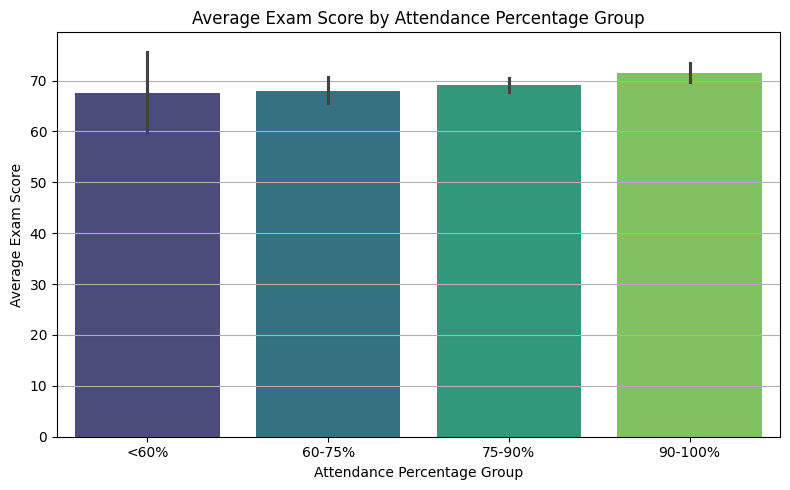

/tmp/ipykernel_742217/3444411665.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='exam_score', data=df, estimator='mean', palette='viridis')


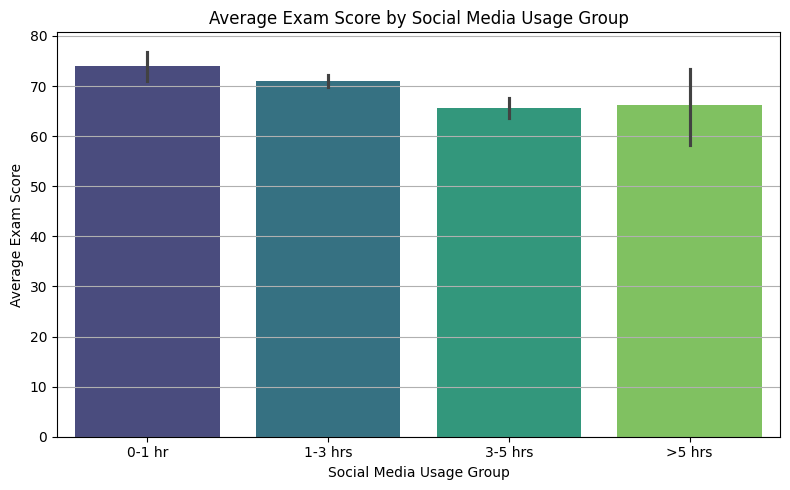

/tmp/ipykernel_742217/3444411665.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='exam_score', data=df, estimator='mean', palette='viridis')


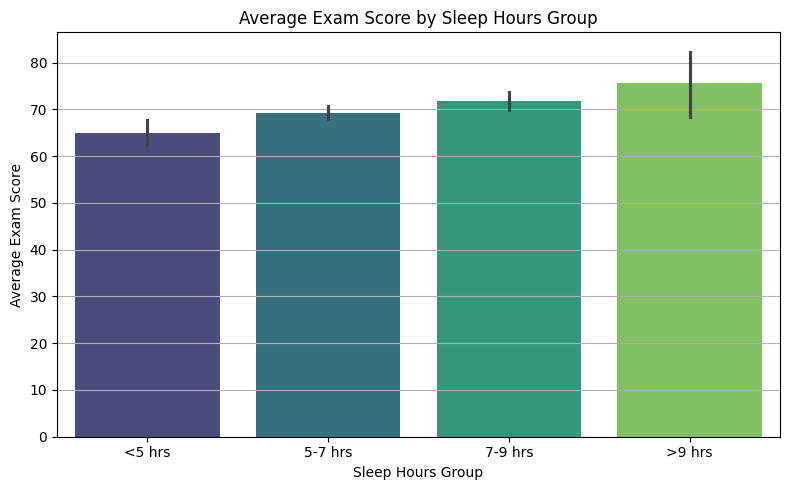

In [96]:
df['attendance_bin'] = pd.cut(df['attendance_percentage'], bins=[0, 60, 75, 90, 100], 
                               labels=['<60%', '60-75%', '75-90%', '90-100%'])

df['social_media_bin'] = pd.cut(df['social_media_hours'], bins=[-1, 1, 3, 5, 24],
                                 labels=['0-1 hr', '1-3 hrs', '3-5 hrs', '>5 hrs'])

df['sleep_bin'] = pd.cut(df['sleep_hours'], bins=[0, 5, 7, 9, 12],
                         labels=['<5 hrs', '5-7 hrs', '7-9 hrs', '>9 hrs'])

bin_columns = {
    'attendance_bin': 'Attendance Percentage Group',
    'social_media_bin': 'Social Media Usage Group',
    'sleep_bin': 'Sleep Hours Group'
}

for col, label in bin_columns.items():
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='exam_score', data=df, estimator='mean', palette='viridis')
    plt.title(f'Average Exam Score by {label}')
    plt.xlabel(label)
    plt.ylabel('Average Exam Score')
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.show()

Observe that the longest bars are 90-100% for attendance, 0-1 hr for social media usage hours and >9 hours for sleep hours. This clearly tells us that we need enough rest to be able to focus on an exam. No matter how long you want to study for, you still to have enough rest or all that studying becomes pointless. Students also need to not spend a lot of time on social media as it affects their performance. Attendance to class is also very important for acing exam.

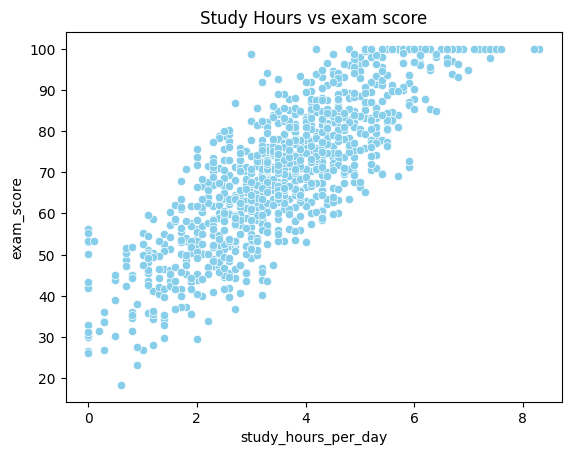

In [97]:
sns.scatterplot(x=df['study_hours_per_day'],y=df['exam_score'], color='skyblue',data=df)
plt.title(f"Study Hours vs exam score")
plt.show()

In [98]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

/tmp/ipykernel_742217/2171727293.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='exam_score', data=df, estimator='mean', ci=None, palette='pastel')
/tmp/ipykernel_742217/2171727293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='exam_score', data=df, estimator='mean', ci=None, palette='pastel')


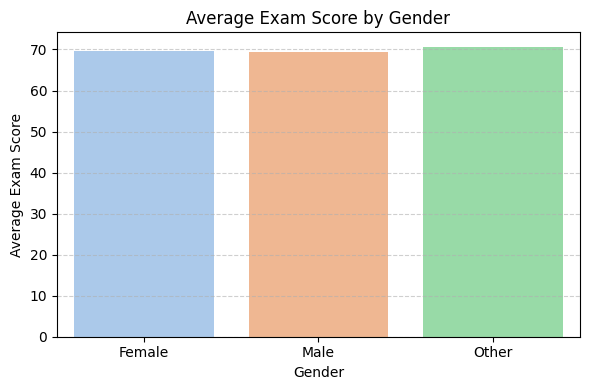

In [99]:
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='exam_score', data=df, estimator='mean', ci=None, palette='pastel')
plt.title('Average Exam Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [100]:
print(df['extracurricular_participation'].unique())


['Yes' 'No']


/tmp/ipykernel_742217/2876088453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='extracurricular_participation', y='exam_score', data=df, estimator='mean', palette='pastel')


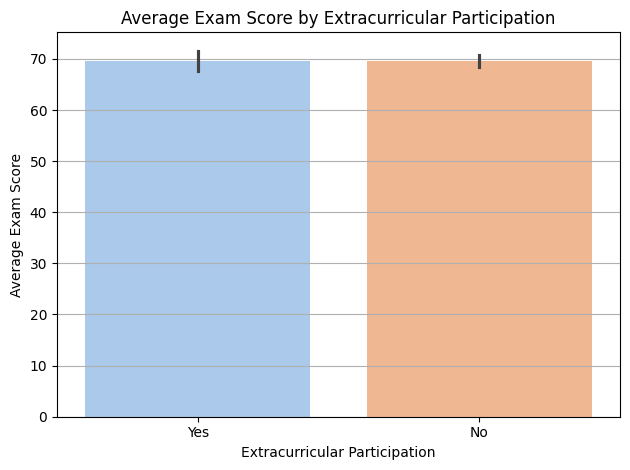

In [101]:
sns.barplot(x='extracurricular_participation', y='exam_score', data=df, estimator='mean', palette='pastel')
plt.title('Average Exam Score by Extracurricular Participation')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Average Exam Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

/tmp/ipykernel_742217/2001989010.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='extracurricular_participation', y='exam_score', data=df, palette='Set2')


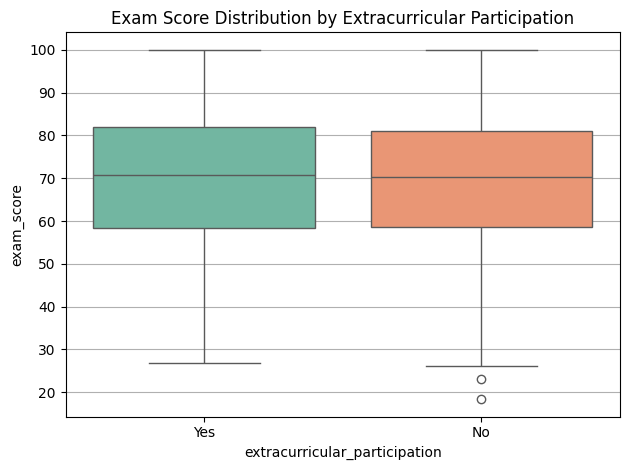

In [102]:
sns.boxplot(x='extracurricular_participation', y='exam_score', data=df, palette='Set2')
plt.title('Exam Score Distribution by Extracurricular Participation')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


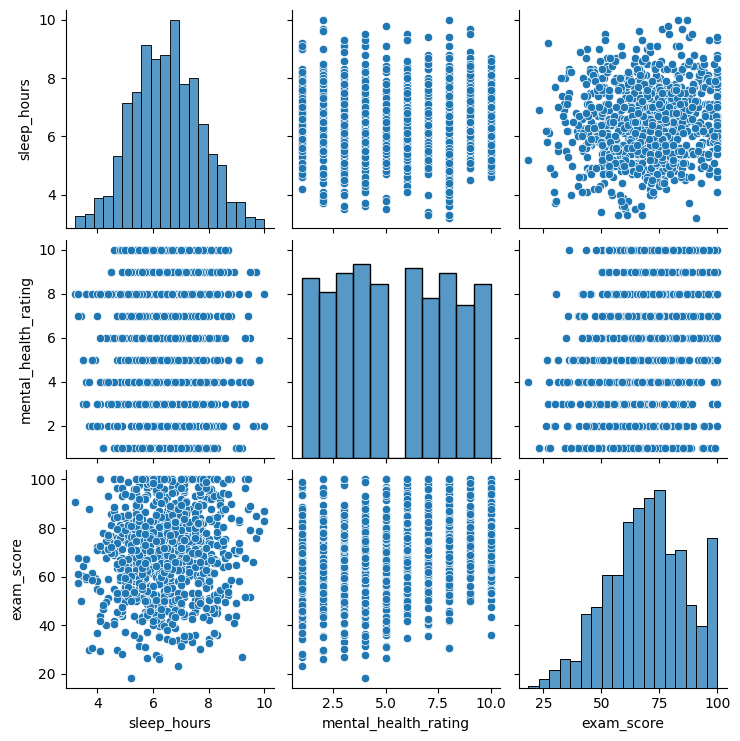

In [103]:
sns.pairplot(df, vars=['sleep_hours', 'mental_health_rating', 'exam_score'])
